# B3S5 Actualización Ago2021 Práctica de Gráficos, Correlación, ANOVA, RLS y RLM


### Carga de librerías

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [13]:
# Ojo, el archivo de datos se actualizó el 20 de septiembre del 2021 y se 
# descargó de la siguiente dirección
# https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva
# Mediante la ruta: https://drive.google.com/file/d/1q05Sm7R8zUwoSVd3VOteCsvhl_nhnEPu/view
# Lo movemos a nuestro directorio de trabajo
# Intentamos cargarlo
filename = 'IDEFC_NM_ago21.csv'
# El archivo tiene codificación ANSI y si lo cargo, puede enviar error o cargar mal letras como la ñ
# Una opción para corregir este problema es abrir el archivo en bloc de notas -> guardar como y cambiar la codificación
# de ANSI a UTF-8
df = pd.read_csv(filename,encoding="ANSI")  #La otra opción es avisarle a Python que el encoding es ANSI y esto también resuelve el problema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21952 entries, 0 to 21951
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     21952 non-null  int64  
 1   Clave_Ent               21952 non-null  int64  
 2   Entidad                 21952 non-null  object 
 3   Bien jurídico afectado  21952 non-null  object 
 4   Tipo de delito          21952 non-null  object 
 5   Subtipo de delito       21952 non-null  object 
 6   Modalidad               21952 non-null  object 
 7   Enero                   21952 non-null  object 
 8   Febrero                 21952 non-null  object 
 9   Marzo                   21952 non-null  object 
 10  Abril                   21952 non-null  object 
 11  Mayo                    21952 non-null  object 
 12  Junio                   21952 non-null  object 
 13  Julio                   21952 non-null  object 
 14  Agosto                  21952 non-null

In [46]:
df.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
       'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Enero', 'Febrero',
       'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
       'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [47]:
#OJO: LOS VALORES DE Enero a Octubre se cargan como objeto y no como número:
for col in ['Enero', 'Febrero','Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',
            'Septiembre','Octubre']:
    df[col] = pd.to_numeric(df[col],errors = 'coerce')

In [48]:
df.dtypes

Año                         int64
Clave_Ent                   int64
Entidad                    object
Bien jurídico afectado     object
Tipo de delito             object
Subtipo de delito          object
Modalidad                  object
Enero                     float64
Febrero                   float64
Marzo                     float64
Abril                     float64
Mayo                      float64
Junio                     float64
Julio                     float64
Agosto                    float64
Septiembre                float64
Octubre                   float64
Noviembre                 float64
Diciembre                 float64
dtype: object

# Carga anterior de datos, como puede ver cambian los nombres de las variables

NOTA: No corra la siguiente línea de código para que no desaparezcan las variables del archivo anterior

In [10]:
#OJO: Esta era la carga de un archivo anterior de junio2021 que todavía no era actualizado
#Importar datos de Senado
# Carga de datos. Los datos vienen de:https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva
#La ruta para los datos es: https://drive.google.com/file/d/1q05Sm7R8zUwoSVd3VOteCsvhl_nhnEPu/view?usp=sharing
#df = pd.read_csv('C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque 1 Instalacion y tipos de variables/datosSenado/IDEFC_jun2021.csv')
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44352 entries, 0 to 44351
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        44352 non-null  int64 
 1   INEGI       44352 non-null  int64 
 2   ENTIDAD     44352 non-null  object
 3   MODALIDAD   44352 non-null  object
 4   TIPO        44352 non-null  object
 5   SUBTIPO     44352 non-null  object
 6   ENERO       44352 non-null  int64 
 7   FEBRERO     44352 non-null  int64 
 8   MARZO       44352 non-null  int64 
 9   ABRIL       44352 non-null  int64 
 10  MAYO        44352 non-null  int64 
 11  JUNIO       44352 non-null  int64 
 12  JULIO       44352 non-null  int64 
 13  AGOSTO      44352 non-null  int64 
 14  SEPTIEMBRE  44352 non-null  int64 
 15  OCTUBRE     44352 non-null  int64 
 16  NOVIEMBRE   44352 non-null  int64 
 17  DICIEMBRE   44352 non-null  int64 
dtypes: int64(14), object(4)
memory usage: 6.1+ MB


In [5]:
df

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0,0,0,0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21947,2021,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,11,11,10,6,7,7,2,9,NaN,NaN,NaN,NaN
21948,2021,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,0,2,0,1,1,0,1,NaN,NaN,NaN,NaN
21949,2021,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,24,21,26,32,31,37,33,19,NaN,NaN,NaN,NaN
21950,2021,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,12,4,6,14,32,55,12,8,NaN,NaN,NaN,NaN


In [10]:
#Aquí definimos el número de delitos que analizaremos, los r más frecuentes
r=8
delitos = pd.value_counts(df['Tipo de delito']).head(r).index
#delitos = ['Robo', 'Homicidio', 'Lesiones', 'Secuestro', 'Feminicidio',
#       'Violación equiparada', 'Abuso de confianza', 'Rapto', 'Acoso sexual',
#       'Evasión de presos']
df_=df.loc[df['Tipo de delito'].isin(delitos)]
delitos

Index(['Robo', 'Lesiones', 'Homicidio', 'Secuestro', 'Feminicidio',
       'Incumplimiento de obligaciones de asistencia familiar', 'Despojo',
       'Aborto'],
      dtype='object')

In [12]:
pd.value_counts(df['Tipo de delito']).head(r)

Robo                                                     8064
Lesiones                                                 2016
Homicidio                                                2016
Secuestro                                                1120
Feminicidio                                               896
Incumplimiento de obligaciones de asistencia familiar     224
Despojo                                                   224
Aborto                                                    224
Name: Tipo de delito, dtype: int64

In [7]:
df_

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0,0,0,0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21926,2021,32,Zacatecas,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",2,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
21927,2021,32,Zacatecas,El patrimonio,Robo,Otros robos,Con violencia,64,67,80,97,63,64,48,77,NaN,NaN,NaN,NaN
21928,2021,32,Zacatecas,El patrimonio,Robo,Otros robos,Sin violencia,232,224,267,227,230,256,256,231,NaN,NaN,NaN,NaN
21933,2021,32,Zacatecas,El patrimonio,Despojo,Despojo,Despojo,24,43,39,34,35,34,29,31,NaN,NaN,NaN,NaN


In [8]:
### Procesamiento de los datos
# Esto se tuvo que modificar de la versión anterior porque cambiaron los nombres de las variables
df2=df_.loc[df['Año']==2019]
df2=df2.copy()
df2.drop(['Año','Clave_Ent'],axis='columns', inplace=True)
df3=df2.groupby(['Entidad','Tipo de delito']).sum()
df3.index = df3.index.set_names(['Entidad','Tipo de delito'])
df3.reset_index(inplace=True)
df3 = df3.reset_index()
df4=pd.melt(df3, id_vars=['Entidad','Tipo de delito'], value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo',
                                                          'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre',
                                                          'Diciembre'])
df4.drop('variable',axis='columns', inplace=True)
df5=df4.groupby(['Entidad','Tipo de delito']).sum()
df5.index = df5.index.set_names(['Entidad','Tipo de delito'])
df5.reset_index(inplace=True)
df6=df5.sort_values(by=['Entidad']).pivot(index='Entidad',columns='Tipo de delito',values='value')

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Abril', 'Agosto', 'Enero', 'Febrero', 'Julio', 'Junio', 'Marzo', 'Mayo', 'Octubre', 'Septiembre']"

In [ ]:
df6

In [9]:
#Gráfico de parejas
sns.pairplot(df6)

NameError: name 'df6' is not defined

In [81]:
# Matriz de correlación
corr_matrix=df6.corr()

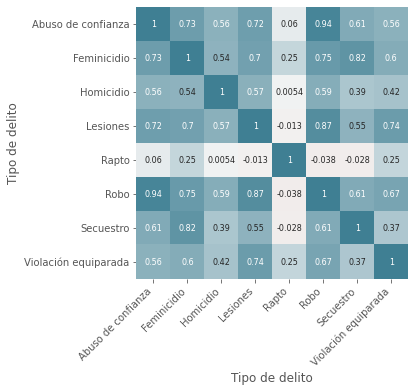

In [82]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [83]:
df6.columns

Index(['Abuso de confianza', 'Feminicidio', 'Homicidio', 'Lesiones', 'Rapto',
       'Robo', 'Secuestro', 'Violación equiparada'],
      dtype='object', name='Tipo de delito')

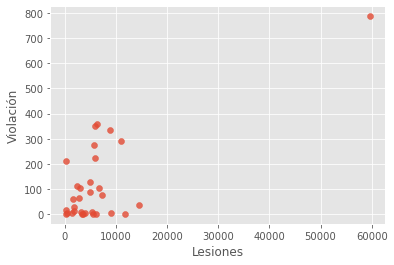

In [85]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df6['Lesiones'], y=df6['Violación equiparada'], alpha= 0.8)
ax.set_xlabel('Lesiones')
ax.set_ylabel('Violación');

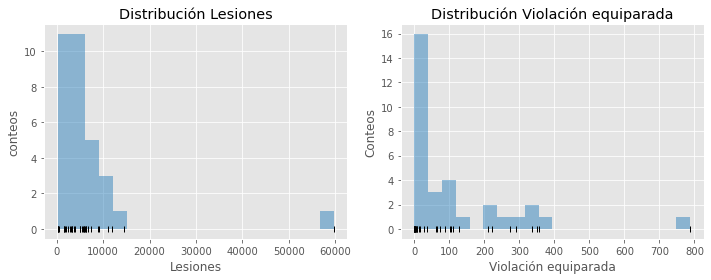

In [86]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=df6['Lesiones'], bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(df6['Lesiones'], np.full_like(df6['Lesiones'], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Lesiones')
axs[0].set_xlabel('Lesiones')
axs[0].set_ylabel('conteos')

axs[1].hist(x=df6['Violación equiparada'], bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(df6['Violación equiparada'], np.full_like(df6['Violación equiparada'], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Violación equiparada')
axs[1].set_xlabel('Violación equiparada')
axs[1].set_ylabel('Conteos')


plt.tight_layout();

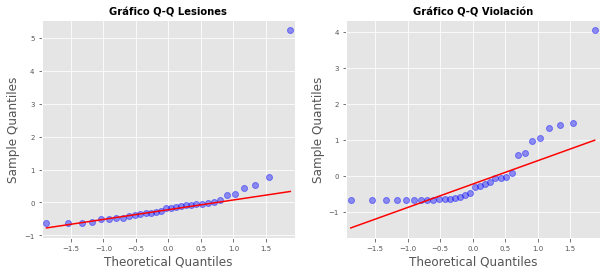

In [87]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    df6['Lesiones'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q Lesiones', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    df6['Violación equiparada'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q Violación', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [88]:
from scipy import stats
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', df6['Lesiones'].corr(df6['Violación equiparada'], method='pearson'))
print('Correlación spearman: ', df6['Lesiones'].corr(df6['Violación equiparada'], method='spearman'))
print('Correlación kendall: ', df6['Lesiones'].corr(df6['Violación equiparada'], method='kendall'))

Correlación Pearson:  0.7430166618693599
Correlación spearman:  0.2794497106336609
Correlación kendall:  0.19919357514927766


In [89]:

# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(df6['Lesiones'], df6['Violación equiparada'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(df6['Lesiones'],df6['Violación equiparada'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(df6['Lesiones'],df6['Violación equiparada'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.7430166618693599, p-value=1.1128463176831746e-06
Correlación Spearman: r=0.2794497106336609, p-value=0.12139231442385227
Correlación Pearson: r=0.19919357514927766, p-value=0.11150923538619749


In [90]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(df6['Lesiones'])
print(f"Variable height: Estadístico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(df6['Violación equiparada'])
print(f"Variable weight: Estadístico = {k2}, p-value = {p_value}")

Variable height: Estadístico = 65.94178424196072, p-value = 4.796489393292854e-15
Variable weight: Estadístico = 31.75800220747567, p-value = 1.270098615201006e-07


In [91]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', df6['Lesiones'].corr(df6['Violación equiparada'], method='pearson'))
print('Correlación spearman: ', df6['Lesiones'].corr(df6['Violación equiparada'], method='spearman'))
print('Correlación kendall: ', df6['Lesiones'].corr(df6['Violación equiparada'], method='kendall'))

Correlación Pearson:  0.7430166618693599
Correlación spearman:  0.2794497106336609
Correlación kendall:  0.19919357514927766


# Regresión Lineal Simple
Estudiaremos la relación entre los delitos de lesiones y los sexuales.


In [101]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# plt.style.use('ggplot') # emulate pretty r-style plots

In [97]:
df6.rename(columns = {'Violación equiparada':'Violacion'}, inplace = True)

In [98]:
df6

Tipo de delito,Abuso de confianza,Feminicidio,Homicidio,Lesiones,Rapto,Robo,Secuestro,Violacion
Entidad,,,,,,,,
Aguascalientes,710.0,5.0,269.0,5003.0,0.0,12988.0,12.0,86.0
Baja California,637.0,23.0,3065.0,8889.0,0.0,37180.0,10.0,336.0
Baja California Sur,301.0,2.0,168.0,1889.0,0.0,8625.0,5.0,27.0
Campeche,2.0,6.0,134.0,177.0,0.0,1063.0,3.0,211.0
Chiapas,185.0,20.0,1186.0,1535.0,0.0,6410.0,21.0,2.0
Chihuahua,818.0,29.0,2449.0,5782.0,0.0,16186.0,16.0,274.0
Ciudad de México,4032.0,72.0,1997.0,10936.0,5.0,109431.0,180.0,290.0
Coahuila de Zaragoza,498.0,24.0,449.0,5004.0,0.0,6654.0,10.0,128.0
Colima,542.0,11.0,779.0,1797.0,0.0,7547.0,18.0,13.0


In [102]:
lm_fit = smf.ols('Lesiones~Violacion', df6).fit()

In [103]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Lesiones   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     36.98
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.11e-06
Time:                        08:03:39   Log-Likelihood:                -327.68
No. Observations:                  32   AIC:                             659.4
Df Residuals:                      30   BIC:                             662.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1388.7528   1503.093      0.924      0.363   -1680.972    4458.477
Violacion     45.1743      7.429      6.081      0.000      30.002      60.347
==============================================================================
Omnibus:                       11.033   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.517
Skew:                           0.967   Prob(JB):                      0.00316
Kurtosis:                       5.213   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
df6.columns

Index(['Abuso de confianza', 'Feminicidio', 'Homicidio', 'Lesiones', 'Rapto',
       'Robo', 'Secuestro', 'Violacion'],
      dtype='object', name='Tipo de delito')

In [105]:
#df6.rename(columns = {'DELITOS PATRIMONIALES':'PATRIMONIALES'}, inplace = True)

In [106]:
lm_fit2 = smf.ols('Lesiones~Feminicidio', df6).fit()

In [107]:
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Lesiones   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     29.00
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.84e-06
Time:                        08:04:28   Log-Likelihood:                -329.71
No. Observations:                  32   AIC:                             663.4
Df Residuals:                      30   BIC:                             666.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -774.3232   1897.883     -0.408      0.686   -4650.317    3101.671
Feminicidio   248.7572     46.190      5.385      0.000     154.424     343.090
==============================================================================
Omnibus:                       29.248   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.046
Skew:                           1.816   Prob(JB):                     1.25e-19
Kurtosis:                      10.218   Cond. No.                         59.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
predictors = pd.DataFrame({'Violacion':[10,1000,40000]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.840496e+03,1462.179845,-1.145674e+03,4.826665e+03,-1.276086e+04,1.644185e+04
1,4.656305e+04,6690.812979,3.289859e+04,6.022752e+04,2.678934e+04,6.633677e+04
2,1.808361e+06,296312.468683,1.203210e+06,2.413512e+06,1.203041e+06,2.413680e+06


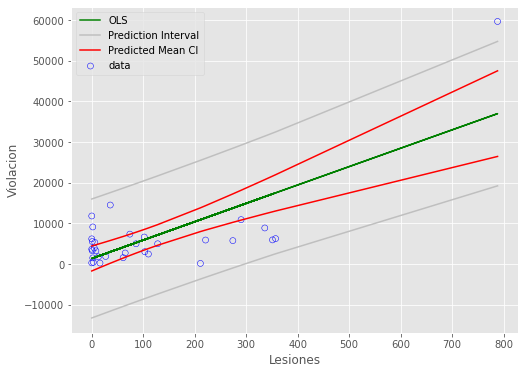

In [136]:
# Gráfico para los datos, los estimadores OLS, predicción e intervalos de confianza
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = df6.Violacion

# Plot the data
ax.scatter(x, df6.Lesiones, facecolors='none', edgecolors='b', label="data")
# plot the models fitted values
ax.plot(x, lm_fit.fittedvalues, 'g', label="OLS")

# To plot prediction and confidence intrvals we need predictions for all data points
predictions = lm_fit.get_prediction(df6['Violacion'].sort_values()).summary_frame(alpha=0.05)
#predictions = lm_fit.get_prediction(pd.DataFrame({'Violacion':[10,100,800]})).summary_frame(alpha=0.05)
# plot the high and low prediction intervals
ax.plot(x.sort_values(), predictions.obs_ci_lower, color='0.75', label="Prediction Interval")
ax.plot(x.sort_values(), predictions.obs_ci_upper, color='0.75', label="")

# plot the high and low mean confidence intervals
ax.plot(x.sort_values(), predictions.mean_ci_lower, color='r',label="Predicted Mean CI")
ax.plot(x.sort_values(), predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best');

plt.xlabel('Lesiones');
plt.ylabel('Violacion');

In [131]:
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5273.742830,1255.662227,2709.338450,7838.147210,-9247.226485,19794.712144
1,16567.318356,2056.321889,12367.748800,20766.887912,1670.380266,31464.256446
2,2608.459006,1398.950675,-248.579425,5465.497436,-11967.035792,17183.953803
3,10920.530593,1428.358766,8003.432827,13837.628358,-3666.855718,25507.916904
4,1479.101453,1494.704263,-1573.491894,4531.694800,-13135.983430,16094.186336
5,13766.511625,1710.996731,10272.190129,17260.833122,-947.178012,28480.201262
6,14489.300459,1795.165169,10823.084080,18155.516838,-266.156923,29244.757841
7,7171.063518,1240.980931,4636.642345,9705.484691,-7344.640760,21686.767796
8,1976.018776,1450.423081,-986.140332,4938.177885,-12620.445405,16572.482957
9,1433.927151,1498.885894,-1627.206225,4495.060527,-13182.943840,16050.798142


In [124]:
df6['Violacion']

AttributeError: 'Series' object has no attribute 'order'